### Joint Distributions Exercise US Arrests

#### Solution to a)
Import and inspect the data set.

In [1]:
import pandas as pd
import numpy as np

# Read Data: make sure you have downloaded the datafile and placed it in 
# a folder named data, in the same directory as this notebook
arrests = pd.read_csv('./data/USArrests.csv')

# As a first inspeaction, print the first rows of the data:
print(arrests.head())
# As well as the dimensions of the set:
print('\nSize of USA Arrests =\n', arrests.shape)

   Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6

Size of USA Arrests =
 (50, 5)


We can thus see, this dataset has 50 entries, corresponding to the 50 states. Furthermore, there are 4 features: Murder, Assault, Urban Population and Rape. 

#### Solution to b)
Create a new data set that contains only the variables Murder, Assault and
Rape for each state.

We can see from the above output that the column states is not labeled, we will thus have to acces this collumn by its location instead (**DataFrame.iloc[]**). The other columns can be acces by their label, using **DataFrame.loc[]**.

In [2]:
states = arrests.iloc[:,0]
features = ['Murder', 'Assault', 'Rape']
# keep only arrests on Murder, Assault and Rape
arrests = arrests.loc[:, features]

#### Solution to c)
Examine the new data set by plotting each state in a 3-Dimensional graph, where
the x-, y-, and z-axis correspond to the numbers of Murder, Assault and
Rape respectively. Write the name of each state at the corresponding point.
 What can you say about Rhode Island? Which is the state with the lowest numbers
of crimes?

In [3]:
""" Hints: """
import matplotlib.pyplot as plt
%matplotlib 
# with this magic function, a seperate window will open, 
# showing the plot. Here you can scroll and rotate the plot. 

# Create figure and 3d plot
fig = plt.figure(figsize=(12, 12))
ax = fig.gca(projection='3d')

x, y, z = 1, 1, 1
# Plot point
ax.plot(x, y, z, '.b')
# Plot state name
ax.text(x, y, z, 'Example')

# Layout and show plot
plt.tight_layout()
plt.show()

Using matplotlib backend: Qt5Agg


In [4]:
import matplotlib.pyplot as plt

%matplotlib 
# with this magic function, a seperate window will open, showing the plot. Here you can scroll and rotate the plot. 

# Create figure and 3d plot
fig = plt.figure(figsize=(12, 12))
ax = fig.gca(projection='3d')

# Plot points 
ax.plot(arrests.iloc[:, 0], arrests.iloc[:, 1], arrests.iloc[:, 2], '.b')
# Plot state names
for i in range(arrests.shape[0]):
    ax.text(arrests.iloc[i, 0], arrests.iloc[i, 1], arrests.iloc[i, 2], str(states[i]))
# Add labels
ax.set_xlabel(arrests.columns.values[0])
ax.set_ylabel(arrests.columns.values[1])
ax.set_zlabel(arrests.columns.values[2])

plt.tight_layout()
plt.show()

Using matplotlib backend: Qt5Agg


#### Solution to d)
Compare the ranges and spread of the three variables. Which variable do you
expect to get the largest loadings for PC1 if you apply PCA to the unscaled data?

The required output is directly given by **arrests.describe()**, but could ofcourse also be obtained by other methods, such as **Dataframe.mean()**, **Dataframe.max()**, **Dataframe.std()** etc..

In [4]:
print(arrests.describe())

         Murder     Assault       Rape
count  50.00000   50.000000  50.000000
mean    7.78800  170.760000  21.232000
std     4.35551   83.337661   9.366385
min     0.80000   45.000000   7.300000
25%     4.07500  109.000000  15.075000
50%     7.25000  159.000000  20.100000
75%    11.25000  249.000000  26.175000
max    17.40000  337.000000  46.000000


### Solution to e)
Compute PC1 on the unscaled data set. Do the loadings for PC1 match
your expectation from **d)**?

The Principle Components can be found using **sklearn.decomposition.PCA()**. After fitting the arrests data to a **...PCA()** instance, we can access the Principle components through the attribute **.components_**

In [5]:
from sklearn.decomposition import PCA

# find the Principle components by creating a pca instance:
pca = PCA()
pca.fit(arrests)

# Acces the principle components through the attribute components_ 
print('Principle Components are:\n', pca.components_ )

Principle Components are:
 [[ 0.04180743  0.99630506  0.07502247]
 [ 0.02555358 -0.0761298   0.99677042]
 [ 0.99879886 -0.03975532 -0.02864195]]


In [6]:
print('1st Principle Component is:\n', arrests.columns.values, 
      '\n', np.round(pca.components_[0], 5))

1st Principle Component is:
 ['Murder' 'Assault' 'Rape'] 
 [0.04181 0.99631 0.07502]


### Solution to f)
Compute the PCA on the basis of the scaled data. How does the
interpretation of PC1 change?

There are several good ways of normalizing your data, in practise depending on which packages you preffer to use and what functionality you need. Here we will used sklearn, as we also use sklearn for the PCA analysis. 

In [7]:
from sklearn.preprocessing import StandardScaler

# Create a Scaler Instance
scaler  = StandardScaler()
scaler.fit(arrests)
# Normalize the data
arrests_nor = scaler.transform(arrests)
pca.fit(arrests_nor)

# Acces the principle components through the attribute components_ 
print('Principle Components are:\n', pca.components_ )

Principle Components are:
 [[ 0.58260056  0.60798182  0.53938362]
 [ 0.53395322  0.21402358 -0.81797791]
 [ 0.61275652 -0.76456001  0.19994359]]


In [8]:
print('1st Principle Component is:\n', arrests.columns.values, 
      '\n', np.round(pca.components_[0], 5))

1st Principle Component is:
 ['Murder' 'Assault' 'Rape'] 
 [0.5826  0.60798 0.53938]


### Solution to g)
We now consider the second principal component (PC2). Describe the violence
profile of states that have a high PC2 score.

In [9]:
print('2nd Principle Component is:\n', arrests.columns.values, 
      '\n', np.round(pca.components_[1], 5))

2nd Principle Component is:
 ['Murder' 'Assault' 'Rape'] 
 [ 0.53395  0.21402 -0.81798]


### Solution to h)
What percentage of the total variance is explained by the first two principal components?



In [10]:
print('Variance explained by each PC:\n', 
      np.round(pca.explained_variance_ratio_, 5))
print('\nTotal Variance explained when including n PCs:\n', 
      np.cumsum(pca.explained_variance_ratio_).round(5))

Variance explained by each PC:
 [0.78619 0.15268 0.06112]

Total Variance explained when including n PCs:
 [0.78619 0.93888 1.     ]


### Solution i)
Consider the PC2 scores. Verify that the PC1 and PC2 scores are uncorrelated. Then make a plot of PC2 versus PC1, using abbreviated state names instead of plotting symbols.



In [11]:
# Check correlations with numpy:
corr_np = np.correlate(pca.components_[0], pca.components_[1])

print('Correlation between first two PC:\n', corr_np)

Correlation between first two PC:
 [0.]


In [13]:
""" Hints: """
# Create figure and plot
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)

x, y = 1, 1
# Plot point
ax.plot(x, y, 'k.')
# Plot state name
ax.text(x, y, 'Example')
# or 
ax.annotate('Example', (x, y))

# Layout and show plot
plt.tight_layout()
plt.show()

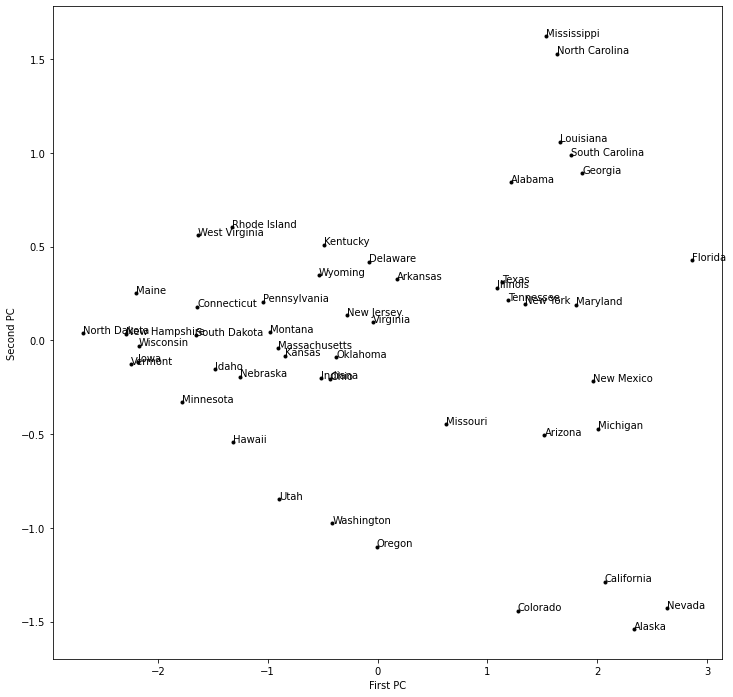

In [13]:
import matplotlib.pyplot as plt
# First find the principle component loadings for all states
pcl0 = np.dot(arrests_nor, pca.components_[0])
pcl1 = np.dot(arrests_nor, pca.components_[1])

# Create figure and plot
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
# Plot points 
ax.plot(pcl0, pcl1, 'k.')
# Plot labels
for i in range(arrests.shape[0]):
    ax.annotate(str(states[i]), (pcl0[i], pcl1[i]))
# Labels
ax.set_xlabel('First PC')
ax.set_ylabel('Second PC') 
    
plt.show()